# Neptune Initialization and creating experiment 

### pip install these packages


- hiplot
- sckitplot
- matplotlib
- seaborn
- neptune-client
- neptune-contrib
- numpy
- pandas


- pip install neptune-client
- pip install neptune-contrib

### Install jupyter extension 
- pip install neptune-notebooks
- jupyter nbextension enable --py neptune-notebooks

In [48]:


import neptune as npt
neptune.init(project_qualified_name='emekaboris/numberofvote')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

params = {'random_state':23, 'n_estimators':30}
npt.create_experiment(name = 'numberofvote', tags = ['params'], params = {**params})





NVMLError: NVML Shared Library Not Found - GPU usage metrics may not be reported.


https://ui.neptune.ai/emekaboris/numberofvote/e/NUM-10


Experiment(NUM-10)

# Data Cleaning and analysis 

       ID Tag  Reputation  Answers  Username    Views  Upvotes
0   52664   a      3942.0      2.0    155623   7855.0     42.0
1  327662   a     26046.0     12.0     21781  55801.0   1175.0
2  468453   c      1358.0      4.0     56177   8067.0     60.0
3   96996   a       264.0      3.0    168793  27064.0      9.0
4  131465   c      4271.0      4.0    112223  13986.0     83.0
                  ID    Reputation        Answers       Username  \
count  330045.000000  3.300450e+05  330045.000000  330045.000000   
mean   235748.682789  7.773147e+03       3.917672   81442.888803   
std    136039.418471  2.706141e+04       3.579515   49215.100730   
min         1.000000  0.000000e+00       0.000000       0.000000   
25%    117909.000000  2.820000e+02       2.000000   39808.000000   
50%    235699.000000  1.236000e+03       3.000000   79010.000000   
75%    353620.000000  5.118000e+03       5.000000  122559.000000   
max    471493.000000  1.042428e+06      76.000000  175738.000000   

         

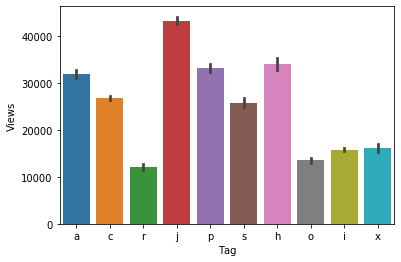

In [49]:
print(df_train.head())
print(df_train.describe())

ax = sns.barplot(x='Tag', y='Views',
           data = df_train)

ax.figure.savefig('svmconf.png')
neptune.log_image('barplot', 'svmconf.png')
npt.log_image('barplot', 'svmconf.png')


In [50]:
from neptunecontrib.versioning.data import log_data_version as ldv
ldv('train.csv')

df_train.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

In [51]:
x = df_train['Views'].value_counts()
y =df_train['Views'].index

In [52]:
import neptunecontrib.api
from neptunecontrib.api import log_chart as lc



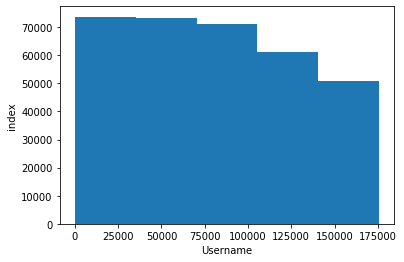

In [53]:
fig = plt.figure()

plt.hist(x =df_train.Username, bins=5)
plt.xlabel('Username')
plt.ylabel('index')
plt.show()


lc('Username', fig)

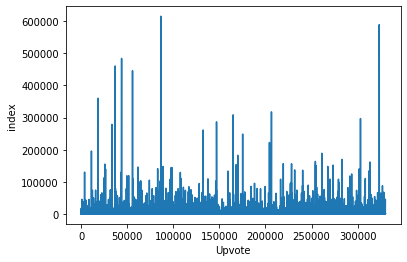

In [54]:
fig2 = plt.figure()

plt.plot(df_train.Upvotes)
plt.xlabel('Upvote')
plt.ylabel('index')
plt.show()


lc('Upvotes', fig2)

In [55]:
df_train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [56]:
df_test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [57]:
df_train.isnull().values.any()
df_test.isnull().values.any()

False

In [58]:
df_train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [59]:
del df_train['Username']
del df_test['Username']


In [60]:
df_train.corr()

,ID,Reputation,Answers,Views,Upvotes
ID,1.000000,0.008546,0.017448,0.017400,0.006328
Reputation,0.008546,1.000000,0.066504,0.036455,0.266710
Answers,0.017448,0.066504,1.000000,0.498642,0.202033
Views,0.017400,0.036455,0.498642,1.000000,0.437336
Upvotes,0.006328,0.266710,0.202033,0.437336,1.000000


# Feature Engineering

In [61]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [62]:
df_train['Tag'] = labelencoder.fit_transform(df_train['Tag'])
df_test['Tag'] = labelencoder.fit_transform(df_test['Tag'])

#df_train['Answers'] = labelencoder.fit_transform(df_train['Answers'])
#df_test['Answers'] = labelencoder.fit_transform(df_test['Answers'])




df_train['Views'] = labelencoder.fit_transform(df_train['Views'])
df_test['Views'] = labelencoder.fit_transform(df_test['Views'])

df_train['Reputation'] = labelencoder.fit_transform(df_train['Reputation'])
df_test['Reputation'] = labelencoder.fit_transform(df_test['Reputation'])

try other feature engineering technique 

# Cross Validation

In [63]:
x_test = df_test.drop(['ID'], axis = 1)

In [64]:
X = df_train.drop(['Upvotes', 'ID'], axis= 1)
y = df_train.Upvotes

In [65]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)

# Train model

In [79]:
from sklearn.ensemble import AdaBoostRegressor


params = {'random_state':23, 'n_estimators':30}
Ada = AdaBoostRegressor(**params)
Ada.fit(X_train, y_train)
y_ada = Ada.predict(X_test)
y_ada_t = Ada.predict(X_train)
y_ada_test = Ada.predict(x_test)

In [80]:
from sklearn.metrics import r2_score
print("ada model accuracy(in test):", r2_score(y_test, y_ada))
print("ada model accuracy(in train):", r2_score(y_train, y_ada_t))
score_test = r2_score(y_test, y_ada)
score_train = r2_score(y_train, y_ada_t)

ada model accuracy(in test): 0.7139343263631702
ada model accuracy(in train): 0.7951715472302879


In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("regr model accuracy(in test):", sqrt(mean_squared_error(y_test, y_ada)*100))
print("regr model accuracy(in train):", sqrt(mean_squared_error(y_train, y_ada_t)*100))
mscore_test = sqrt(mean_squared_error(y_test, y_ada))
mscore_train = sqrt(mean_squared_error(y_train, y_ada_t))

regr model accuracy(in test): 19727.38930819728
regr model accuracy(in train): 16209.595660316612


In [82]:
npt.log_metric('R2score train', score_train)
npt.log_metric('R2score test', score_test)
npt.log_metric('mscore train', mscore_train)
npt.log_metric('mscore test', mscore_test)




Experiencing connection interruptions. Reestablishing communication with Neptune.
Experiencing connection interruptions. Reestablishing communication with Neptune.
Experiencing connection interruptions. Reestablishing communication with Neptune.
Experiencing connection interruptions. Reestablishing communication with Neptune.
Experiencing connection interruptions. Reestablishing communication with Neptune.
Experiencing connection interruptions. Reestablishing communication with Neptune.
Experiencing connection interruptions. Reestablishing communication with Neptune.
Experiencing connection interruptions. Reestablishing communication with Neptune.
Experiencing connection interruptions. Reestablishing communication with Neptune.
Experiencing connection interruptions. Reestablishing communication with Neptune.
Experiencing connection interruptions. Reestablishing communication with Neptune.
Experiencing connection interruptions. Reestablishing communication with Neptune.
Experiencing con

# Feature importance 

Feature: 0, Score: 0.01528
Feature: 1, Score: 0.42830
Feature: 2, Score: 0.05877
Feature: 3, Score: 0.49765


<BarContainer object of 4 artists>

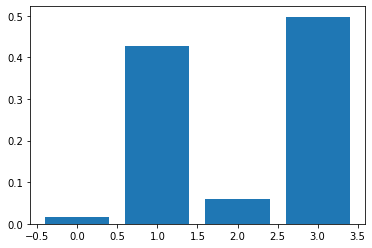

In [72]:
import matplotlib.pyplot as plt
importance = Ada.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig3 = plt.figure()
plt.bar([x for x in range(len(importance))], importance)





## Log Feature importance 

In [73]:
for i,v in enumerate(importance):
    npt.log_metric("Feature",i)
    npt.log_metric("FeatureScore",v)
    
lc("Feature importance", fig3)

# Export submission

In [74]:
submission = pd.DataFrame({"ID":df_test["ID"],
                           "Upvotes":y_ada_test})

submission.to_csv("submit7b.csv", index=False)
ldv( 'submit7b.csv')